# Forex CNN in Keras

The method investigated below involes converting Forex timeseries data into RGB format via hexadecimal.  This may make a format that is friendly to a CNN.

## Converting timeseries data to RGB

## 1. Examining the data

First we'll load up some data freely available on the web.  Here is USD-EUR data for the year 2000.

In [55]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

usd_eur_2000 = pd.read_csv("DAT_MT_EURUSD_M1_2000.csv")
usd_eur_2000[:10]

,2000.05.30,17:27,0.9302,0.9302.1,0.9302.2,0.9302.3,0
0,2000.05.30,17:35,0.9304,0.9305,0.9304,0.9305,0
1,2000.05.30,17:38,0.9304,0.9304,0.9303,0.9303,0
2,2000.05.30,17:43,0.9301,0.9301,0.9300,0.9300,0
3,2000.05.30,17:44,0.9298,0.9298,0.9297,0.9297,0
4,2000.05.30,18:29,0.9298,0.9299,0.9298,0.9299,0
5,2000.05.30,18:37,0.9300,0.9300,0.9300,0.9300,0
6,2000.05.30,18:40,0.9299,0.9299,0.9299,0.9299,0
7,2000.05.30,18:41,0.9300,0.9300,0.9300,0.9300,0
8,2000.05.30,18:42,0.9299,0.9299,0.9298,0.9299,0
9,2000.05.30,18:43,0.9300,0.9300,0.9300,0.9300,0


These columns aren't well labled but that's okay, data is typicaly in OHLC - Open / High / Low / Close format.  Let's look at a graph. To do that we will need to make a real datetime out of the first two columns.

In [56]:
from datetime import tzinfo, timedelta, datetime
import time as _time

del usd_eur_2000["0"]
columns = ["datetimes", "waste", "open", "high", "low", "close"]
usd_eur_2000.columns = columns

dates = usd_eur_2000.iloc[:, 0]
times = usd_eur_2000.iloc[:, 1]
concated_date = [dates[x] + ":" + times[x] for x in range(len(usd_eur_2000))]
datetimes = [datetime.strptime(t, "%Y.%m.%d:%H:%M") for t in concated_date]   
usd_eur_2000["datetimes"] = datetimes 

del usd_eur_2000["waste"]
usd_eur_2000[:5]


,datetimes,open,high,low,close
0,2000-05-30 17:35:00,0.9304,0.9305,0.9304,0.9305
1,2000-05-30 17:38:00,0.9304,0.9304,0.9303,0.9303
2,2000-05-30 17:43:00,0.9301,0.9301,0.9300,0.9300
3,2000-05-30 17:44:00,0.9298,0.9298,0.9297,0.9297
4,2000-05-30 18:29:00,0.9298,0.9299,0.9298,0.9299


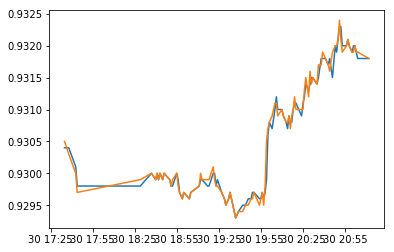

In [59]:
plt.plot(usd_eur_2000["datetimes"][:100], usd_eur_2000["open"][:100])
plt.plot(usd_eur_2000["datetimes"][:100], usd_eur_2000["close"][:100])